<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Course GML - CRAPAUDUC Project

In [174]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns
import numpy             as np

## Data importation

In [175]:
# Import labels file 
df_labels = pd.read_csv('../data/path_and_bounding_box.csv')
df_labels.head()

,class,top_left_x,top_left_y,w,h,img_size_x,img_size_y,name,date,takes,path
0,grenouille-crapaud,1242,236,208,343,1920,1080,2017-03-10T02:20:00.jpg,2017-03-10 02:20:00,474,camera_06_unnested/2017-03-10T02_20_00.jpg
1,grenouille-crapaud,1242,191,214,279,1920,1080,2017-03-10T02:20:01.jpg,2017-03-10 02:20:01,474,camera_06_unnested/2017-03-10T02_20_01.jpg
2,grenouille-crapaud,1312,101,141,307,1920,1080,2017-03-10T02:20:02.jpg,2017-03-10 02:20:02,474,camera_06_unnested/2017-03-10T02_20_02.jpg
3,grenouille-crapaud,1151,340,220,239,1920,1080,2017-03-10T02:20:22.jpg,2017-03-10 02:20:22,475,camera_06_unnested/2017-03-10T02_20_22.jpg
4,grenouille-crapaud,1151,334,200,234,1920,1080,2017-03-10T02:20:23.jpg,2017-03-10 02:20:23,475,camera_06_unnested/2017-03-10T02_20_23.jpg


In [176]:
df_labels['class'].value_counts()

feuille               1085
insect                 270
triton                 224
grenouille-crapaud     201
souris                 197
plastic                 38
oiseau                   3
animal                   2
Name: class, dtype: int64

In [177]:
df_labels.path

0       camera_06_unnested/2017-03-10T02_20_00.jpg
1       camera_06_unnested/2017-03-10T02_20_01.jpg
2       camera_06_unnested/2017-03-10T02_20_02.jpg
3       camera_06_unnested/2017-03-10T02_20_22.jpg
4       camera_06_unnested/2017-03-10T02_20_23.jpg
                           ...                    
2015    camera_04_unnested/2017-03-09T07_20_33.jpg
2016    camera_04_unnested/2017-03-09T07_20_34.jpg
2017    camera_04_unnested/2017-03-09T07_20_35.jpg
2018    camera_04_unnested/2017-03-09T07_20_36.jpg
2019    camera_04_unnested/2017-03-09T07_20_37.jpg
Name: path, Length: 2020, dtype: object

In [178]:
df_labels['class'].value_counts()

feuille               1085
insect                 270
triton                 224
grenouille-crapaud     201
souris                 197
plastic                 38
oiseau                   3
animal                   2
Name: class, dtype: int64

## Data preparation

In [179]:
# Search for missing values
df_labels.isnull().sum()

class         0
top_left_x    0
top_left_y    0
w             0
h             0
img_size_x    0
img_size_y    0
name          0
date          0
takes         0
path          0
dtype: int64

In [180]:
type(df_labels['date'][0])

str

In [181]:
# String to datetime so we can work with numbers (order them, ...)
df_labels['dateheure'] = [dt.strptime(df_labels['date'][i], '%Y-%m-%d %H:%M:%S') for i in range(len(df_labels['date']))]
df_labels['dateheure'].head()

0   2017-03-10 02:20:00
1   2017-03-10 02:20:01
2   2017-03-10 02:20:02
3   2017-03-10 02:20:22
4   2017-03-10 02:20:23
Name: dateheure, dtype: datetime64[ns]

## Exploratory analysis

### Counts and relative percentage of quantity observed, for each label

In [182]:
# Percentage of each label in dataframe 
print(df_labels['dateheure'][0].date())

2017-03-10


In [183]:
# Number of dates registered
pd.Series([d.date() for d in df_labels['dateheure']]).value_counts()

2017-04-05    910
2017-04-06    266
2017-04-01    260
2017-03-09    153
2017-04-15     98
2017-04-13     83
2017-03-15     47
2017-03-13     40
2017-03-14     36
2017-03-23     32
2017-03-22     28
2017-03-11     24
2017-03-12     19
2017-03-10     10
2017-03-16      8
2017-03-19      6
dtype: int64

### Observation per date per label

In [184]:
# Creation of a column storing the date in format yyyy-mm-dd
df_labels['y_m_d'] = [d.date() for d in df_labels['dateheure']]

Text(0.5, 0, 'Date')

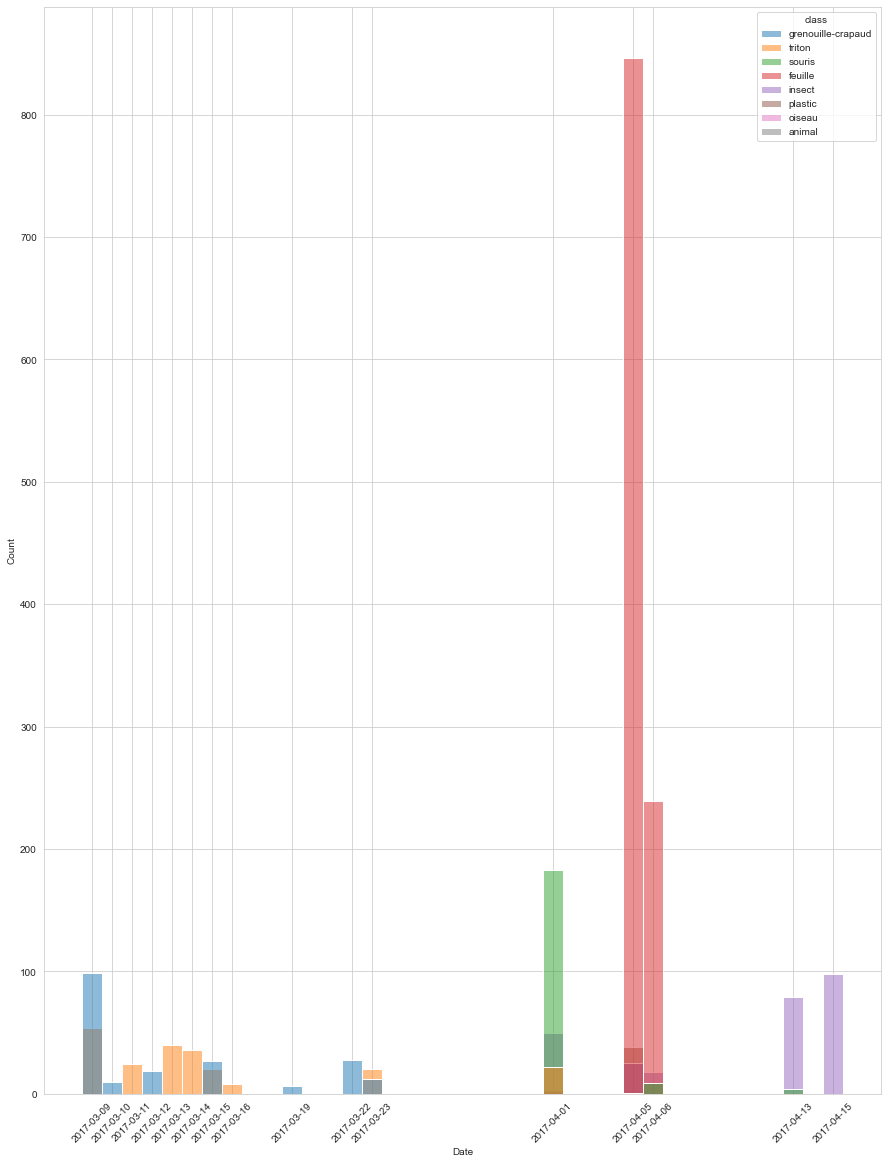

In [185]:
plt.figure(figsize=(15,20))
sns.histplot(data=df_labels, x='y_m_d', hue='class')

plt.xticks(df_labels['y_m_d'].unique(), rotation=45)

plt.xlabel("Date")

### Labels observed (date - time - number of observation)

In [186]:
# Creation of a dataframe containing only the samples where we saw a frog-toad or a triton
df_activated_label = df_labels.loc[(df_labels['class']=='grenouille-crapaud') | (df_labels['class']=='triton')]
df_activated_label['class'].value_counts()

triton                224
grenouille-crapaud    201
Name: class, dtype: int64

In [187]:
# Size of new dataframe 
df_activated_label.shape

(425, 13)

In [188]:
# Dates at which frog-toad or triton were seen
# Number of dates registered
pd.Series(df_activated_label['y_m_d']).value_counts()

2017-03-09    153
2017-03-15     47
2017-03-13     40
2017-03-14     36
2017-03-23     32
2017-03-22     28
2017-03-11     24
2017-04-01     22
2017-03-12     19
2017-03-10     10
2017-03-16      8
2017-03-19      6
Name: y_m_d, dtype: int64

/var/folders/zg/9zpxgr6n3d358_qwx52_x__h0000gn/T/ipykernel_17631/510979837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activated_label['h_m_s']  = [d.time() for d in df_activated_label['dateheure']]


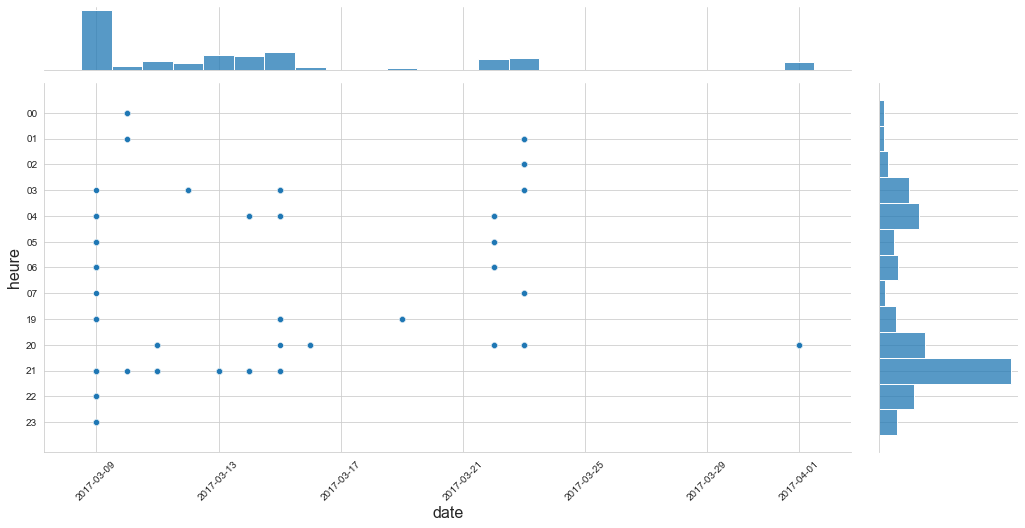

In [189]:
# Regroupement des données par heure d'observation

# Reprise du df avec les données labellées pour le trier par heures croissantes
df_activated_label['h_m_s']  = [d.time() for d in df_activated_label['dateheure']]
df_activated_sorted_h = df_activated_label.sort_values(by=['h_m_s'])

# Pour n'avoir que les heures pleines sur l'axe des y
y = [k.strftime('%H') for k in df_activated_sorted_h['h_m_s']]

sns.set_style("whitegrid")

plot = sns.jointplot(data=df_activated_label, x='y_m_d', y=y)
plot.set_axis_labels('date', 'heure', fontsize=16)

plot.ax_joint.tick_params(axis="x", rotation=45)

plot.fig.set_figwidth(15)
plot.fig.set_figheight(7)

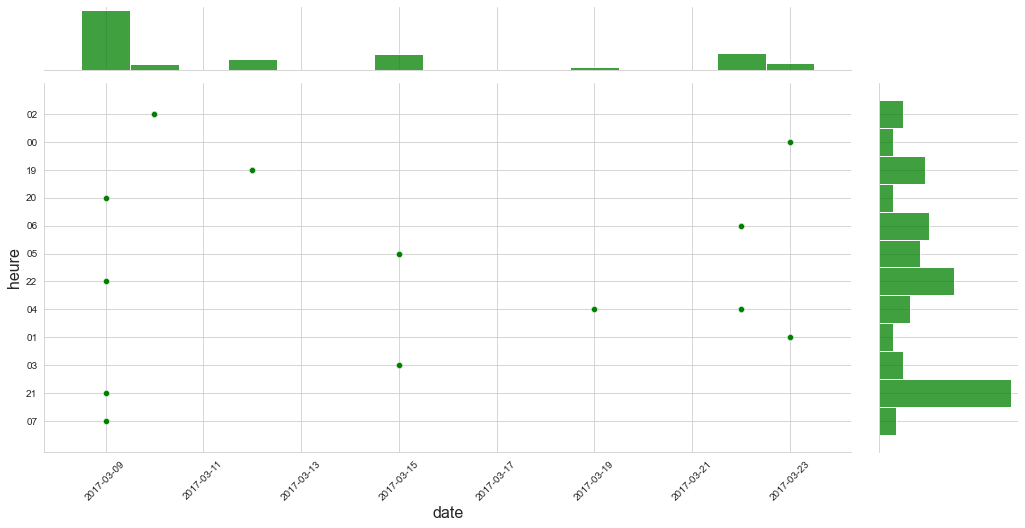

In [190]:
# Obersvations (date-heure) pour le label grenouille-crapaud

df_g_c = df_activated_label.loc[df_activated_label['class']=='grenouille-crapaud']
y      = [k.strftime('%H') for k in df_g_c['h_m_s']]

sns.set_style("whitegrid")

plot = sns.jointplot(data=df_g_c, x='y_m_d', y=y, color='g')

plot.set_axis_labels('date', 'heure', fontsize=16)

plot.ax_joint.tick_params(axis="x", rotation=45)

plot.fig.set_figwidth(15)
plot.fig.set_figheight(7)

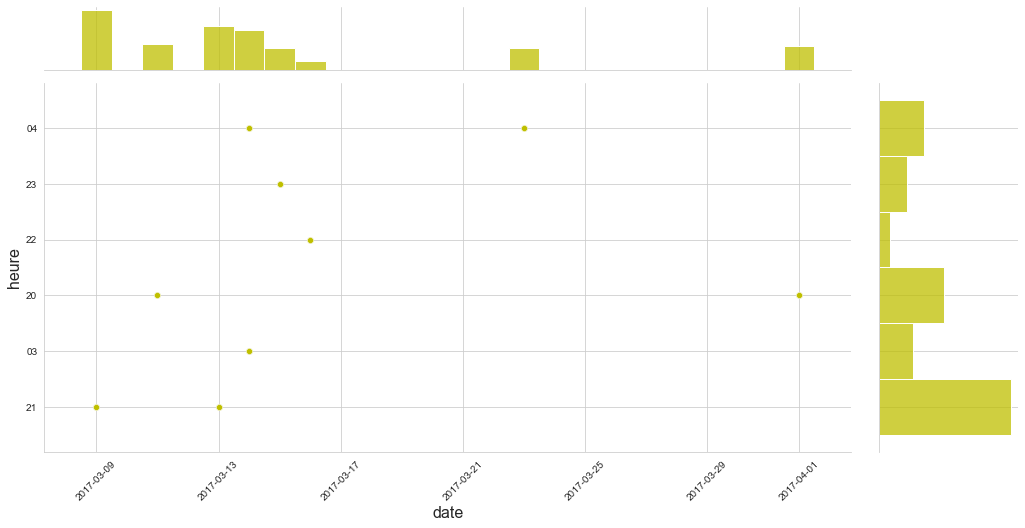

In [191]:
# Obersvations (date-heure) pour le label triton

df_t = df_activated_label.loc[df_activated_label['class']=='triton']
y    = [k.strftime('%H') for k in df_t['h_m_s']]

sns.set_style("whitegrid")

plot = sns.jointplot(data=df_t, x='y_m_d', y=y, color='y')

plot.set_axis_labels('date', 'heure', fontsize=16)

plot.ax_joint.tick_params(axis="x", rotation=45)

plot.fig.set_figwidth(15)
plot.fig.set_figheight(7)

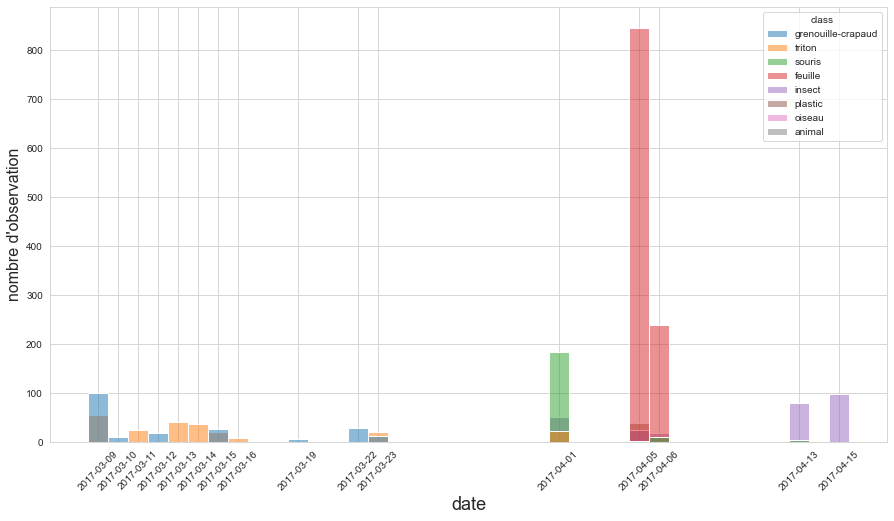

In [192]:
# Histogramme de nombre d'objets captés par date
plt.figure(figsize=(15,8))

sns.histplot(data=df_labels, x='y_m_d', hue='class', binwidth=1)
plt.xticks(df_labels['y_m_d'].unique(), rotation=45)

plt.xlabel('date', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

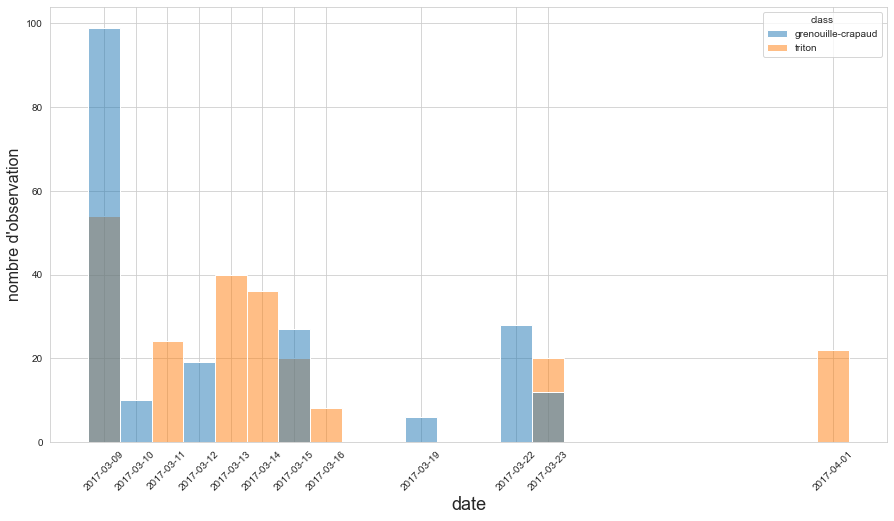

In [193]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés par jour
plt.figure(figsize=(15,8))

sns.histplot(data=df_activated_label, x='y_m_d', hue='class')
plt.xticks(df_activated_label['y_m_d'].unique(), rotation=45)

plt.xlabel('date', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

## Obersvations by hour

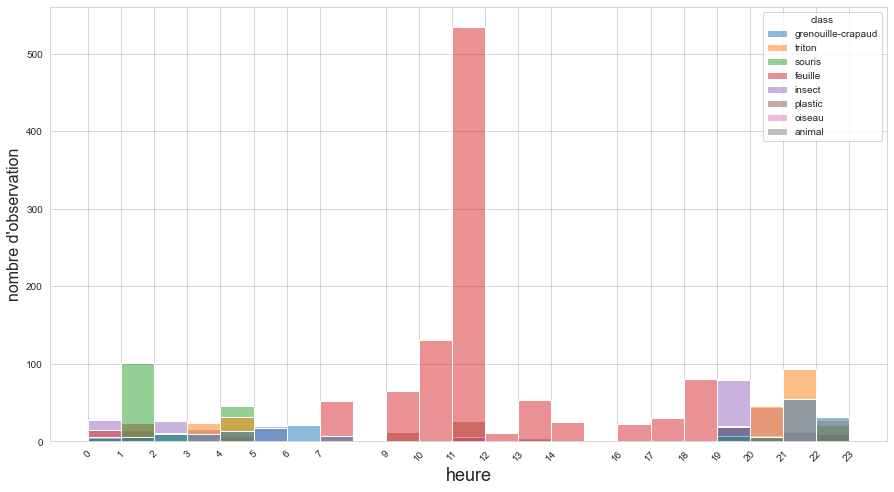

In [194]:
# Histogramme de nombre d'objets captés par heure
df_labels['h_m_s']  = [d.time() for d in df_labels['dateheure']]
df_labels['h']  = [d.hour for d in df_labels['h_m_s']]

plt.figure(figsize=(15,8))

sns.histplot(data=df_labels, x='h', hue='class', binwidth=1)
plt.xticks(df_labels['h'].unique(), rotation=45)

plt.xlabel('heure', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

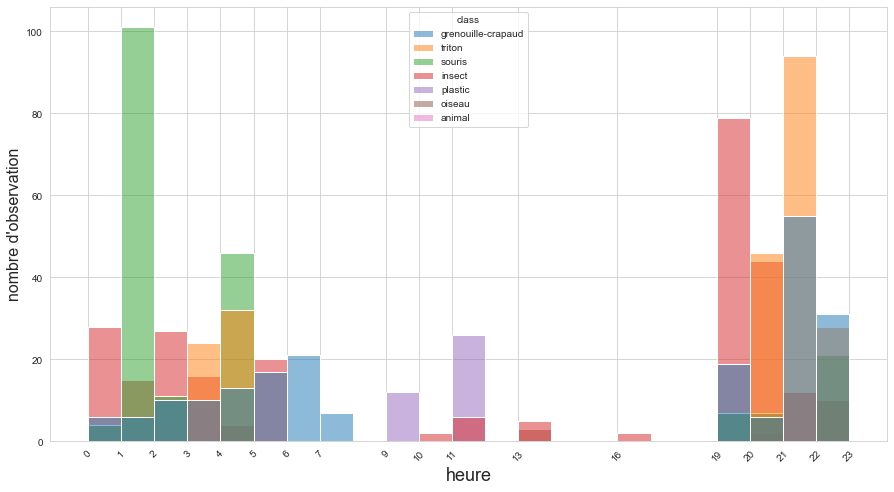

In [195]:
# Histogramme de nombre d'objets captés par heure (sans les feuilles)
df_labels['h_m_s']  = [d.time() for d in df_labels['dateheure']]
df_labels['h']  = [d.hour for d in df_labels['h_m_s']]

plt.figure(figsize=(15,8))

df_labels[~(df_labels['class'] == 'feuille')]

sns.histplot(data=df_labels[~(df_labels['class'] == 'feuille')], x='h', hue='class', binwidth=1)
plt.xticks(df_labels[~(df_labels['class'] == 'feuille')]['h'].unique(), rotation=45)

plt.xlabel('heure', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

/var/folders/zg/9zpxgr6n3d358_qwx52_x__h0000gn/T/ipykernel_17631/768214508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activated_label['h']  = [d.hour for d in df_activated_label['h_m_s']]


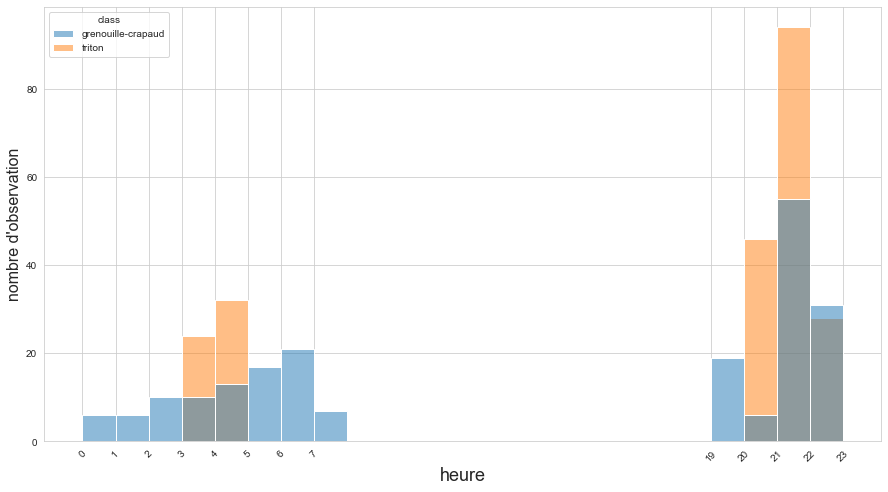

In [196]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés par heure
df_activated_label['h']  = [d.hour for d in df_activated_label['h_m_s']]

plt.figure(figsize=(15,8))

sns.histplot(data=df_activated_label, x='h', hue='class', binwidth=1)
plt.xticks(df_activated_label['h'].unique(), rotation=45)

plt.xlabel('heure', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

## Ajout des données météorologiques

In [201]:
df_meteo = pd.read_csv('../data/meteo.csv')
df_meteo.head()

,date,temperature_celcius,wind_km/h,pressure_millibar,precipitation_mm,rain_bool,humidity
0,2017-02-24,6,13,1014.50,0.0,True,53
1,2017-03-07,4,7,1018.82,2.0,True,84
2,2017-04-15,12,6,1018.21,0.0,True,58
3,2017-04-30,9,4,1010.28,0.1,True,61
4,2017-06-10,20,5,1019.35,0.0,False,61


In [202]:
type(df_activated_label['y_m_d'][0])

datetime.date

In [203]:
type(df_meteo['date'][0])

str

In [204]:
df_meteo['date'] = [dt.strptime(df_meteo['date'][i], '%Y-%m-%d').date() for i in range(len(df_meteo['date']))]
df_meteo['date'].head()

0    2017-02-24
1    2017-03-07
2    2017-04-15
3    2017-04-30
4    2017-06-10
Name: date, dtype: object

In [205]:
# Rename column from df_meteo so it matches the name of the one from df_activated_label
df_meteo = df_meteo.rename({'date': 'y_m_d'}, axis='columns')
df_meteo.head()

,y_m_d,temperature_celcius,wind_km/h,pressure_millibar,precipitation_mm,rain_bool,humidity
0,2017-02-24,6,13,1014.50,0.0,True,53
1,2017-03-07,4,7,1018.82,2.0,True,84
2,2017-04-15,12,6,1018.21,0.0,True,58
3,2017-04-30,9,4,1010.28,0.1,True,61
4,2017-06-10,20,5,1019.35,0.0,False,61


In [206]:
df_join_all = pd.merge(df_labels, df_meteo, how='inner', on = 'y_m_d')
df_join_all.head()

,class,top_left_x,top_left_y,w,h,img_size_x,img_size_y,name,date,takes,path,dateheure,y_m_d,h_m_s,temperature_celcius,wind_km/h,pressure_millibar,precipitation_mm,rain_bool,humidity
0,grenouille-crapaud,1242,236,208,2,1920,1080,2017-03-10T02:20:00.jpg,2017-03-10 02:20:00,474,camera_06_unnested/2017-03-10T02_20_00.jpg,2017-03-10 02:20:00,2017-03-10,02:20:00,9,8,1024.28,0.0,False,72
1,grenouille-crapaud,1242,191,214,2,1920,1080,2017-03-10T02:20:01.jpg,2017-03-10 02:20:01,474,camera_06_unnested/2017-03-10T02_20_01.jpg,2017-03-10 02:20:01,2017-03-10,02:20:01,9,8,1024.28,0.0,False,72
2,grenouille-crapaud,1312,101,141,2,1920,1080,2017-03-10T02:20:02.jpg,2017-03-10 02:20:02,474,camera_06_unnested/2017-03-10T02_20_02.jpg,2017-03-10 02:20:02,2017-03-10,02:20:02,9,8,1024.28,0.0,False,72
3,grenouille-crapaud,1151,340,220,2,1920,1080,2017-03-10T02:20:22.jpg,2017-03-10 02:20:22,475,camera_06_unnested/2017-03-10T02_20_22.jpg,2017-03-10 02:20:22,2017-03-10,02:20:22,9,8,1024.28,0.0,False,72
4,grenouille-crapaud,1151,334,200,2,1920,1080,2017-03-10T02:20:23.jpg,2017-03-10 02:20:23,475,camera_06_unnested/2017-03-10T02_20_23.jpg,2017-03-10 02:20:23,2017-03-10,02:20:23,9,8,1024.28,0.0,False,72


In [207]:
df_join_activated = pd.merge(df_activated_label, df_meteo, how='inner', on = 'y_m_d')
df_join_activated.head()

,class,top_left_x,top_left_y,w,h,img_size_x,img_size_y,name,date,takes,path,dateheure,y_m_d,h_m_s,temperature_celcius,wind_km/h,pressure_millibar,precipitation_mm,rain_bool,humidity
0,grenouille-crapaud,1242,236,208,2,1920,1080,2017-03-10T02:20:00.jpg,2017-03-10 02:20:00,474,camera_06_unnested/2017-03-10T02_20_00.jpg,2017-03-10 02:20:00,2017-03-10,02:20:00,9,8,1024.28,0.0,False,72
1,grenouille-crapaud,1242,191,214,2,1920,1080,2017-03-10T02:20:01.jpg,2017-03-10 02:20:01,474,camera_06_unnested/2017-03-10T02_20_01.jpg,2017-03-10 02:20:01,2017-03-10,02:20:01,9,8,1024.28,0.0,False,72
2,grenouille-crapaud,1312,101,141,2,1920,1080,2017-03-10T02:20:02.jpg,2017-03-10 02:20:02,474,camera_06_unnested/2017-03-10T02_20_02.jpg,2017-03-10 02:20:02,2017-03-10,02:20:02,9,8,1024.28,0.0,False,72
3,grenouille-crapaud,1151,340,220,2,1920,1080,2017-03-10T02:20:22.jpg,2017-03-10 02:20:22,475,camera_06_unnested/2017-03-10T02_20_22.jpg,2017-03-10 02:20:22,2017-03-10,02:20:22,9,8,1024.28,0.0,False,72
4,grenouille-crapaud,1151,334,200,2,1920,1080,2017-03-10T02:20:23.jpg,2017-03-10 02:20:23,475,camera_06_unnested/2017-03-10T02_20_23.jpg,2017-03-10 02:20:23,2017-03-10,02:20:23,9,8,1024.28,0.0,False,72


In [208]:
# Verification of the uniqueness of the name after joining dataframes
len(df_join['name'].unique())

1069

In [209]:
df_meteo.columns

Index(['y_m_d', 'temperature_celcius', 'wind_km/h', 'pressure_millibar',
       'precipitation_mm', 'rain_bool', 'humidity'],
      dtype='object')

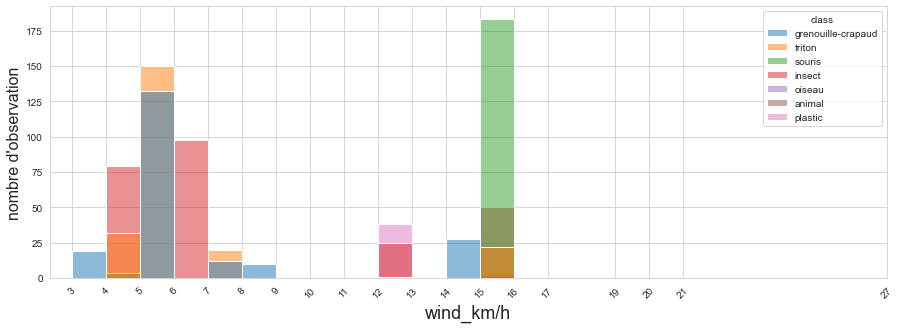

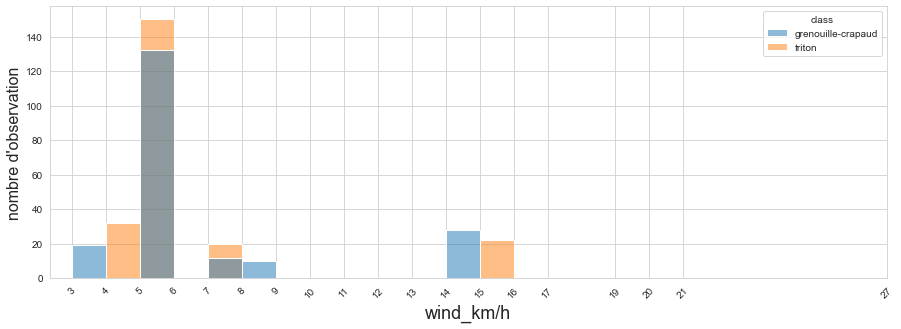

In [210]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés en fonction du vent - sans les feuilles

# Plot de l'ensemble des données 
plt.figure(figsize=(15,5))

df_join_all[~(df_join_all['class'] == 'feuille')]

sns.histplot(data=df_join_all[~(df_join_all['class'] == 'feuille')], x='wind_km/h', hue='class', binwidth=1)
plt.xticks(df_meteo['wind_km/h'].unique(), rotation=45)

plt.xlabel('wind_km/h', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

# Plot des données avec exclusivement crapaud/grenouille et/ou triton
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_activated, x='wind_km/h', hue='class', binwidth=1)
plt.xticks(df_meteo['wind_km/h'].unique(), rotation=45)

plt.xlabel('wind_km/h', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

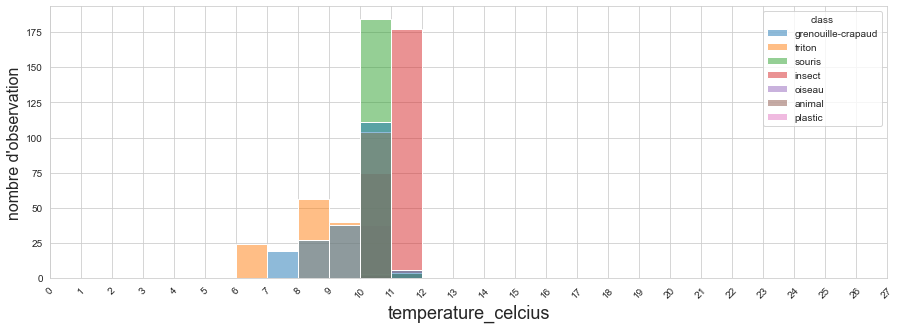

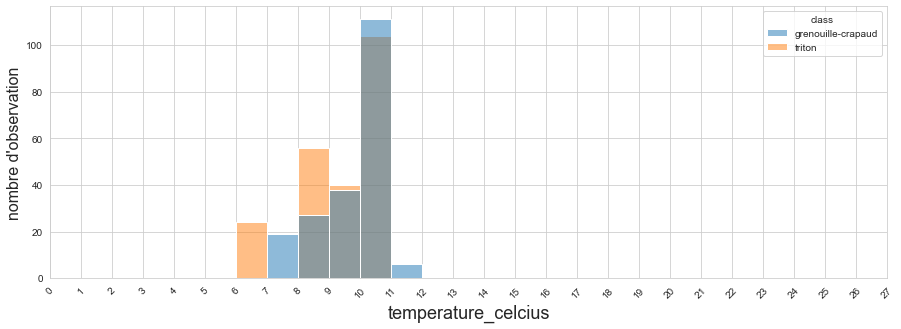

In [211]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés en fonction de la température - sans les feuilles

# Plot de l'ensemble des données 
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_all[~(df_join_all['class'] == 'feuille')], x='temperature_celcius', hue='class', binwidth=1)
plt.xticks(df_meteo['temperature_celcius'].unique(), rotation=45)

plt.xlabel('temperature_celcius', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

# Plot des données avec exclusivement crapaud/grenouille et/ou triton
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_activated, x='temperature_celcius', hue='class', binwidth=1)
plt.xticks(df_meteo['temperature_celcius'].unique(), rotation=45)

plt.xlabel('temperature_celcius', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


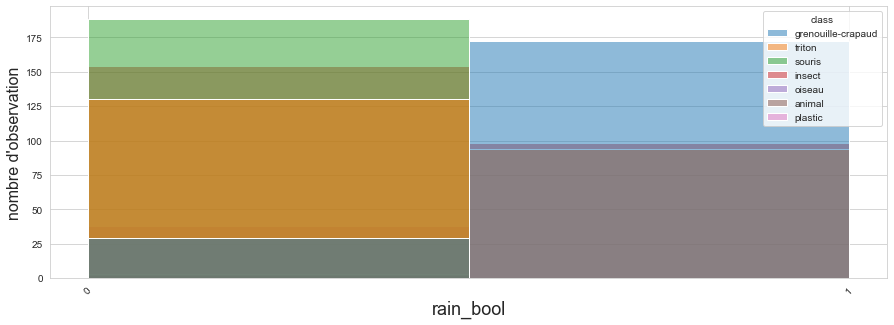

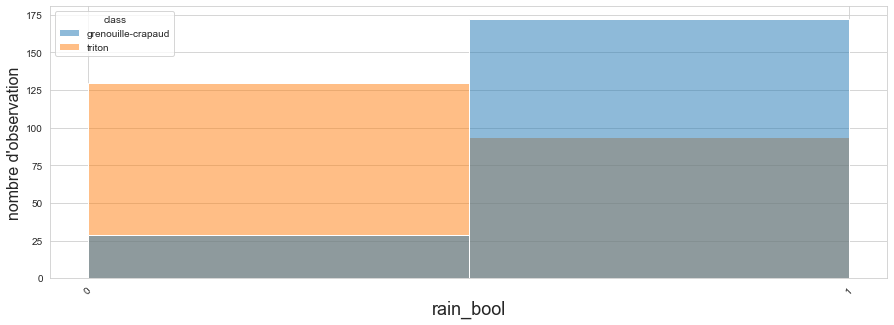

In [212]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés en fonction de s'il pleut - sans les feuilles

# Plot de l'ensemble des données 
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_all[~(df_join_all['class'] == 'feuille')], x='rain_bool', hue='class', binwidth=0.5)
plt.xticks(df_meteo['rain_bool'].unique(), rotation=45)

plt.xlabel('rain_bool', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

# Plot des données avec exclusivement crapaud/grenouille et/ou triton
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_activated, x='rain_bool', hue='class', binwidth=0.5)
plt.xticks(df_meteo['rain_bool'].unique(), rotation=45)

plt.xlabel('rain_bool', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

In [213]:
df_join_activated['rain_bool'].value_counts()

True     266
False    159
Name: rain_bool, dtype: int64

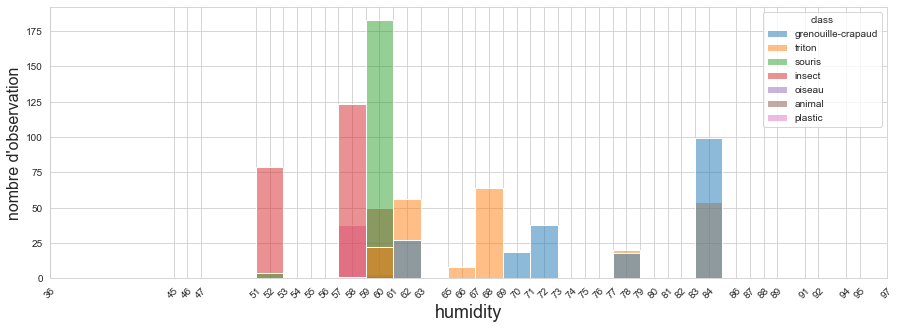

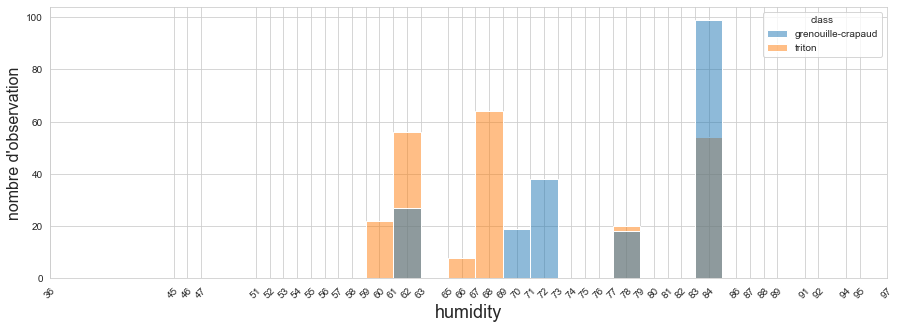

In [214]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés en fonction de l'humidité - sans les feuilles

# Plot de l'ensemble des données 
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_all[~(df_join_all['class'] == 'feuille')], x='humidity', hue='class', binwidth=2)
plt.xticks(df_meteo['humidity'].unique(), rotation=45)

plt.xlabel('humidity', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

# Plot des données avec exclusivement crapaud/grenouille et/ou triton
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_activated, x='humidity', hue='class', binwidth=2)
plt.xticks(df_meteo['humidity'].unique(), rotation=45)

plt.xlabel('humidity', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

In [215]:
df_join_activated['humidity'].min()

59

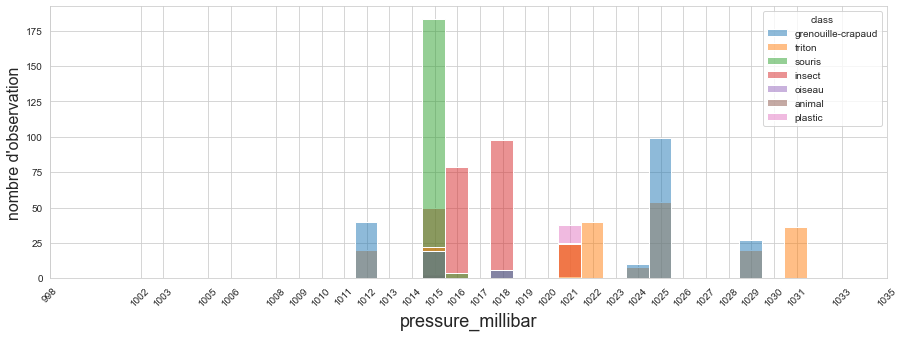

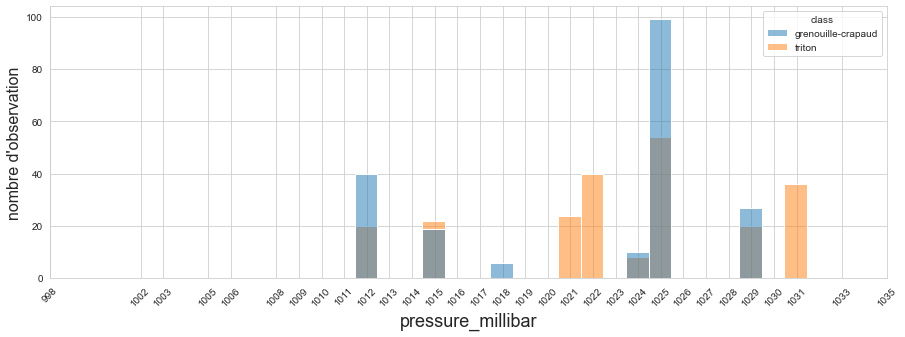

In [222]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés en fonction de la pression (milibar) - sans les feuilles

# Plot de l'ensemble des données 
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_all[~(df_join_all['class'] == 'feuille')], x='pressure_millibar', hue='class', binwidth=1)
plt.xticks(round(df_meteo['pressure_millibar']).unique(), rotation=45)

plt.xlabel('pressure_millibar', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

# Plot des données avec exclusivement crapaud/grenouille et/ou triton
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_activated, x='pressure_millibar', hue='class', binwidth=1)
plt.xticks(round(df_meteo['pressure_millibar']).unique(), rotation=45)

plt.xlabel('pressure_millibar', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

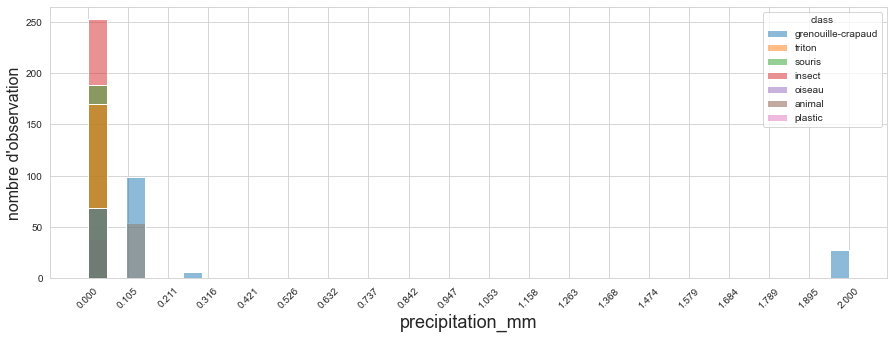

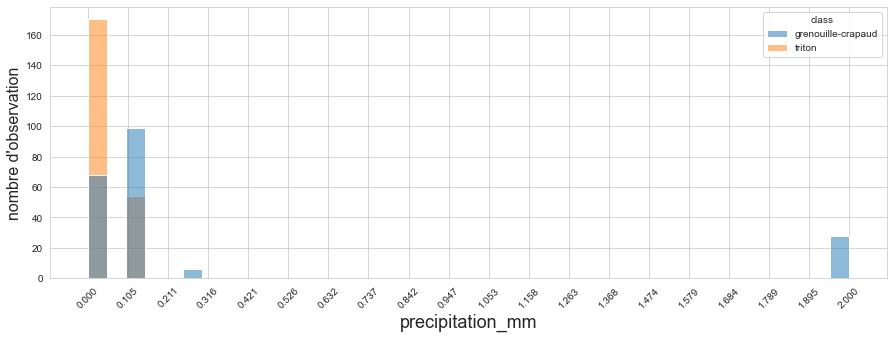

In [217]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés en fonction de la précipitation (mm) - sans les feuilles

# Plot de l'ensemble des données 
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_all[~(df_join_all['class'] == 'feuille')], x='precipitation_mm', hue='class', binwidth=0.05)
plt.xticks(np.linspace(df_join_all['precipitation_mm'].min(), df_join_all['precipitation_mm'].max(), 20), rotation=45)

plt.xlabel('precipitation_mm', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

# Plot des données avec exclusivement crapaud/grenouille et/ou triton
plt.figure(figsize=(15,5))

sns.histplot(data=df_join_activated, x='precipitation_mm', hue='class', binwidth=0.05)
plt.xticks(np.linspace(df_join_activated['precipitation_mm'].min(), df_join_activated['precipitation_mm'].max(), 20), rotation=45)

plt.xlabel('precipitation_mm', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

In [218]:
# Nombre total de prises
len(df_join_activated['takes'].unique())

49

In [219]:
# Nombre d'observations du fichier path_and_bounding box contenant des crpauds-grenouilles et/ou tritons
len(df_join_activated['takes'])

425

In [220]:
# Nombre d'observations totales du fichier path_and_bounding box
len(df_join_all['takes'].unique())

162

In [221]:
# Nombre d'images par prises 
df_join_activated['takes'].value_counts()

692     23
3722    18
3719    16
3716    14
3713    13
298     13
4618    13
1078    12
299     12
297     11
1358    11
5532    11
1077    10
4021    10
5413    10
3988    10
3715     9
4617     9
3720     9
3718     9
694      9
3714     9
1357     9
5533     9
4020     9
1244     8
3723     8
3726     7
3990     7
3681     7
3989     7
5406     7
3717     7
2440     6
2446     6
5017     6
469      6
5412     6
3724     6
475      5
3725     5
470      5
1079     5
5411     5
3721     5
474      5
693      4
691      3
687      1
Name: takes, dtype: int64